# <center><h1 style = "color:navy;">Decision Tree</h1></center>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## <h2 style="color:purple">1. Data Preparation</h2>

In [2]:
temp = pd.ExcelFile("heart_disease.xlsx")

In [3]:
temp.sheet_names

['Description', 'Heart_disease']

In [4]:
pd.read_excel("heart_disease.xlsx",sheet_name='Description')

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


In [5]:
heart = pd.read_excel("heart_disease.xlsx",sheet_name='Heart_disease')
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


## <h2 style="color:purple">2. Exploratory  Data Analysis </h2>

In [6]:
heart.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
heart.shape

(908, 13)

In [8]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [9]:
heart.rename(columns={'trestbps':'restbp'},inplace=True)

In [10]:
heart.nunique()

age         49
sex          2
cp           4
restbp      85
chol       228
fbs          2
restecg      3
thalch     122
exang        4
oldpeak     53
slope        3
thal         3
num          5
dtype: int64

#### <h3 style="color:midnightblue">Univariate Analysis</h3>

**1. Age**

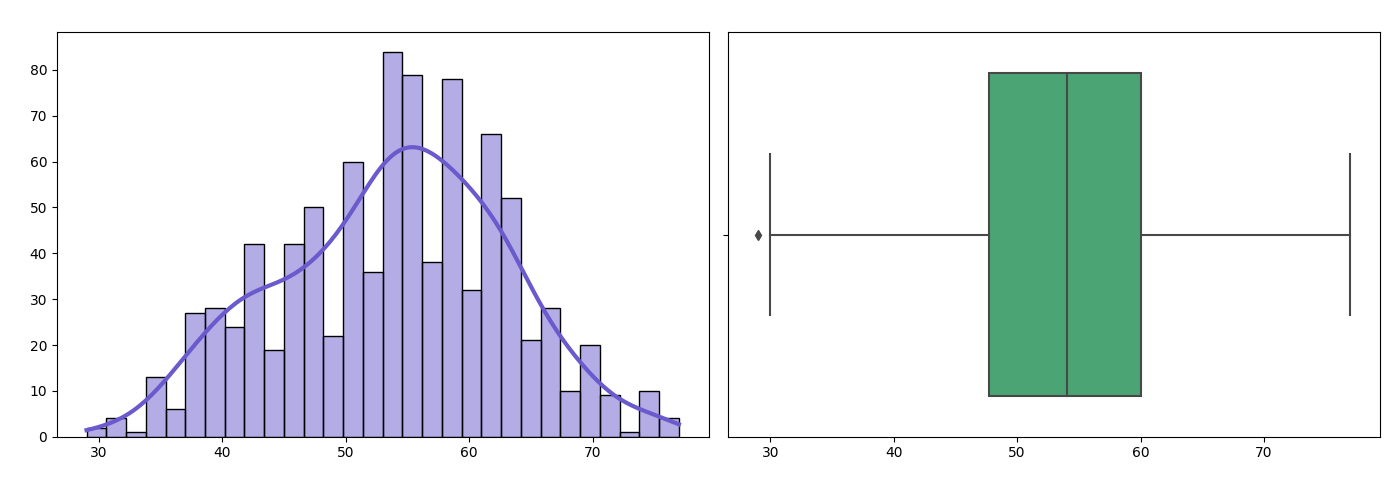

In [11]:

# Define dark pastel colors
hist_color = "#6A5ACD"  # Pastel Purple (Slate Blue)
kde_line_color = "#800080"   # Dark Purple for KDE Line
box_color = "#3CB371"   # Pastel Green (Medium Sea Green)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    heart['age'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Age", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=heart['age'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Age", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


Age gives almost a bell shaped curve. We don't see any problematic outliers too.

**2. Sex**

In [12]:
heart['sex'].unique()

array(['Male', 'Female'], dtype=object)

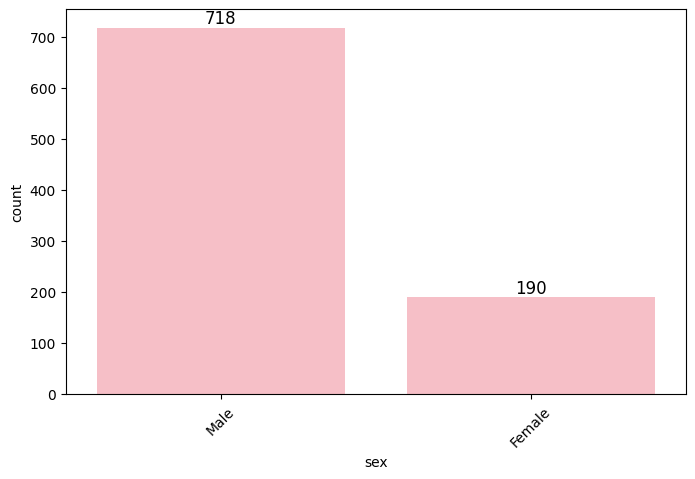

In [13]:
# Define dark pastel color for barplot
count_color = "#FFB6C1"   # Light Pink

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 5)) 
sns.countplot(x="sex", data=heart, color=count_color, ax=ax)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')
    
plt.xticks(rotation=45)
plt.show()

Females are underrepresented in our dataset

**3. CP**

In [14]:
heart['cp'].unique()

array(['typical angina', 'atypical angina', 'asymptomatic', 'non-anginal'],
      dtype=object)

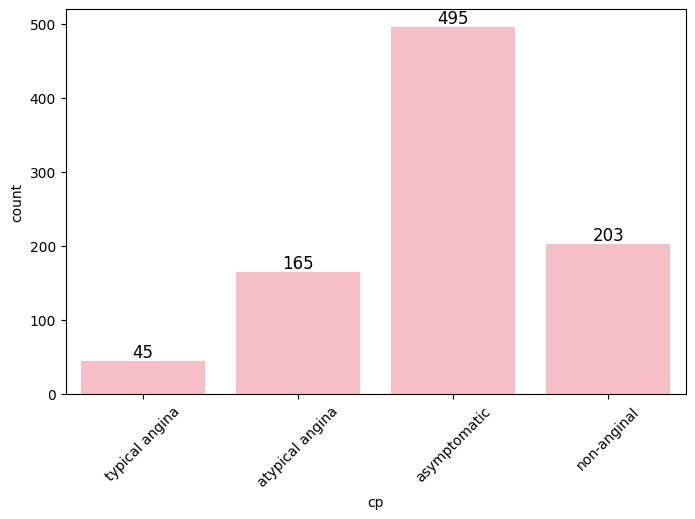

In [15]:
# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 5)) 
sns.countplot(x="cp", data=heart, color=count_color, ax=ax)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')
    
plt.xticks(rotation=45)
plt.show()

**4. restbp**

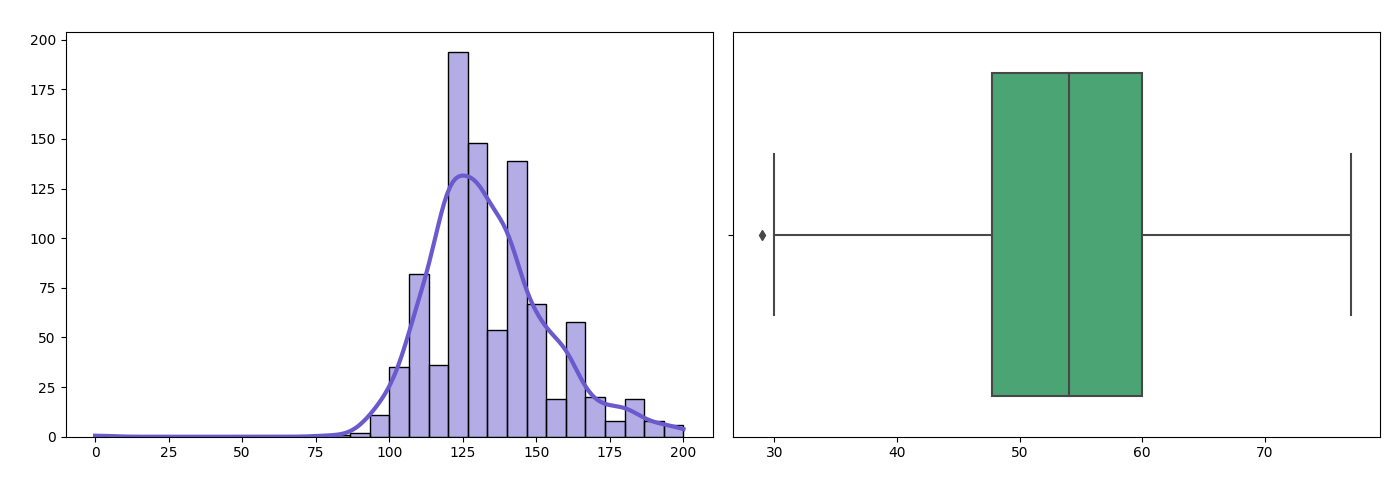

In [16]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    heart['restbp'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Resting blood pressure", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=heart['age'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("restbp", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


There are really low resting bp which makes it having heavy tails in low values.

**5. chol**

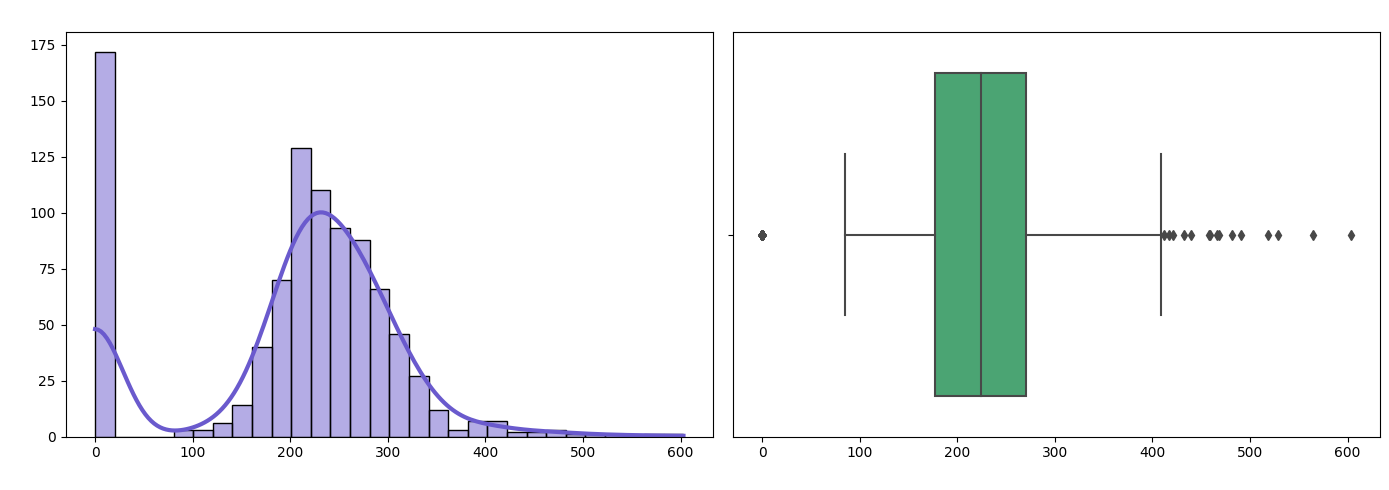

In [17]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    heart['chol'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Cholestrol", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=heart['chol'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Cholestrol", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


There is a bell shaped distribution for chol feature except there are lot of people who doesn't have cholestrol

**6. fbs**

In [18]:
heart['fbs'].unique()

array([ True, False])

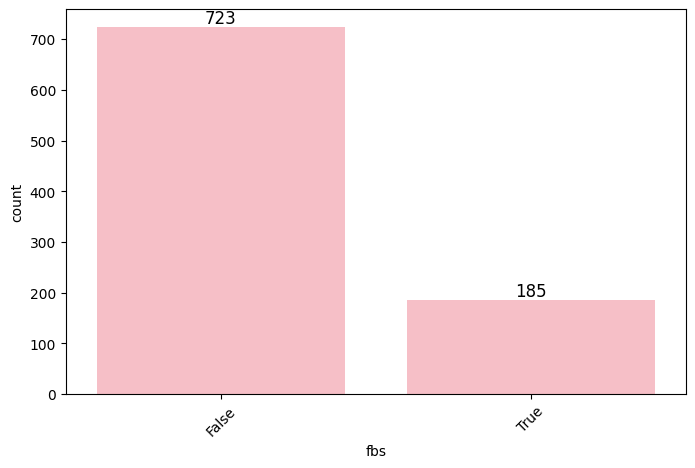

In [19]:
# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 5)) 
sns.countplot(x="fbs", data=heart, color=count_color, ax=ax)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')
    
plt.xticks(rotation=45)
plt.show()

**7. restecg**

In [20]:
heart['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

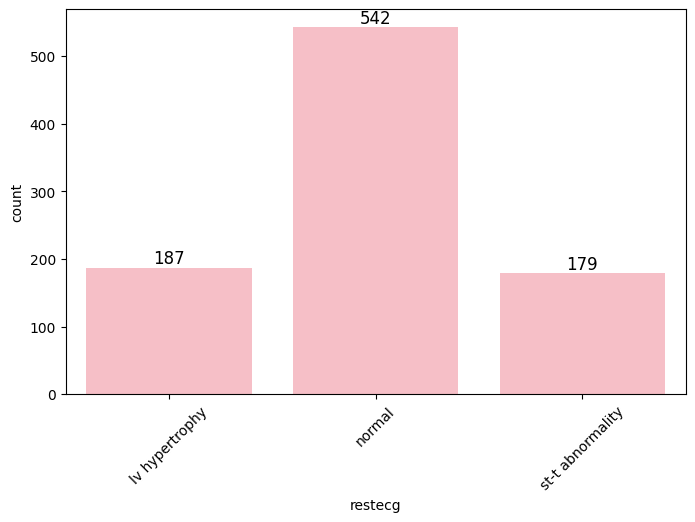

In [21]:
# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 5)) 
sns.countplot(x="restecg", data=heart, color=count_color, ax=ax)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')
    
plt.xticks(rotation=45)
plt.show()

**8. thalch**

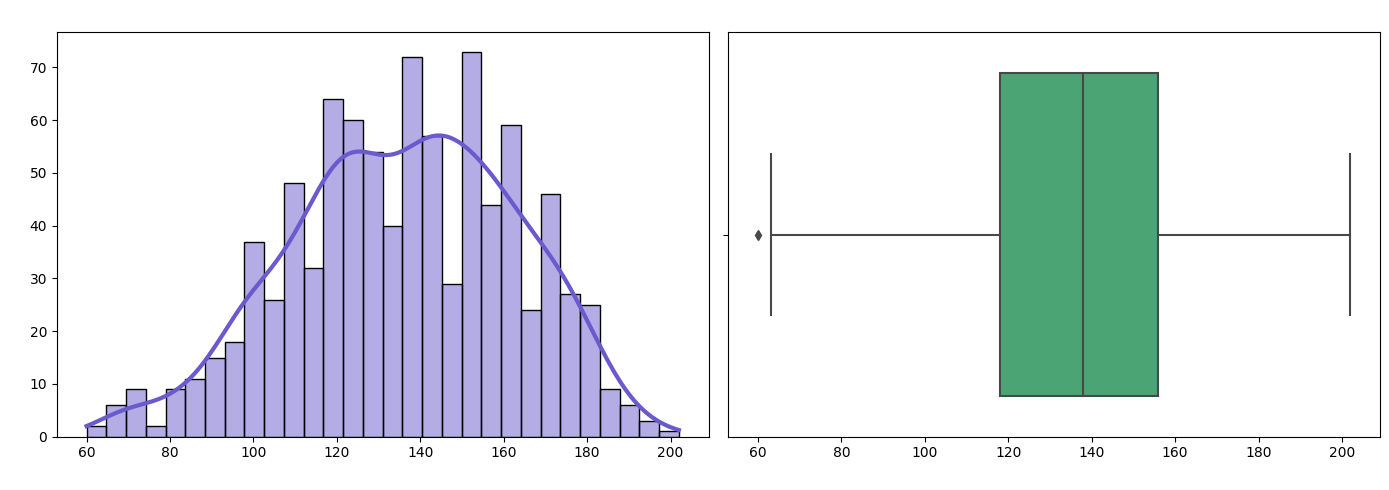

In [22]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    heart['thalch'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Maximum heart rate achieved", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=heart['thalch'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Maximum heart rate achieved", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


This is a platykurtic distribution,which means there is a large standard deviation from the mean. 

**9. exang**

In [23]:
heart['exang'].unique()

array([False, True, 'FALSE', 'TURE'], dtype=object)

In [24]:
heart[heart['exang']=='FALSE'].shape

(19, 13)

In [25]:
heart[heart['exang']=='TURE'].shape

(36, 13)

In [26]:
heart.loc[heart['exang']=='TURE','exang']=True

In [27]:
heart.loc[heart['exang']=='FALSE','exang']=False

In [28]:
heart['exang'].unique()

array([False, True], dtype=object)

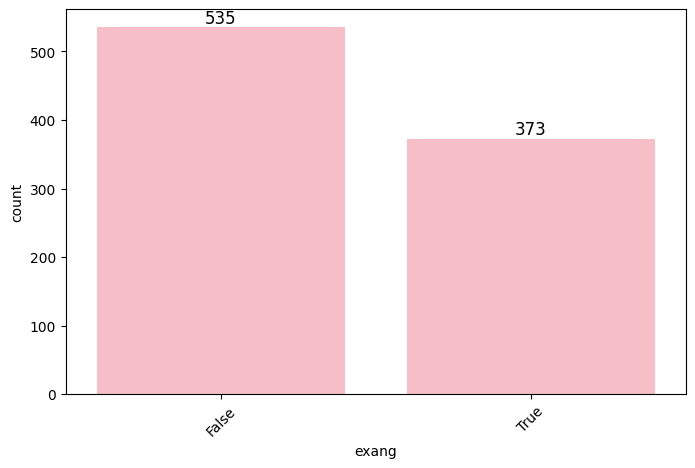

In [29]:
# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 5)) 
sns.countplot(x="exang", data=heart, color=count_color, ax=ax)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')
    
plt.xticks(rotation=45)
plt.show()

**10. oldpeak**

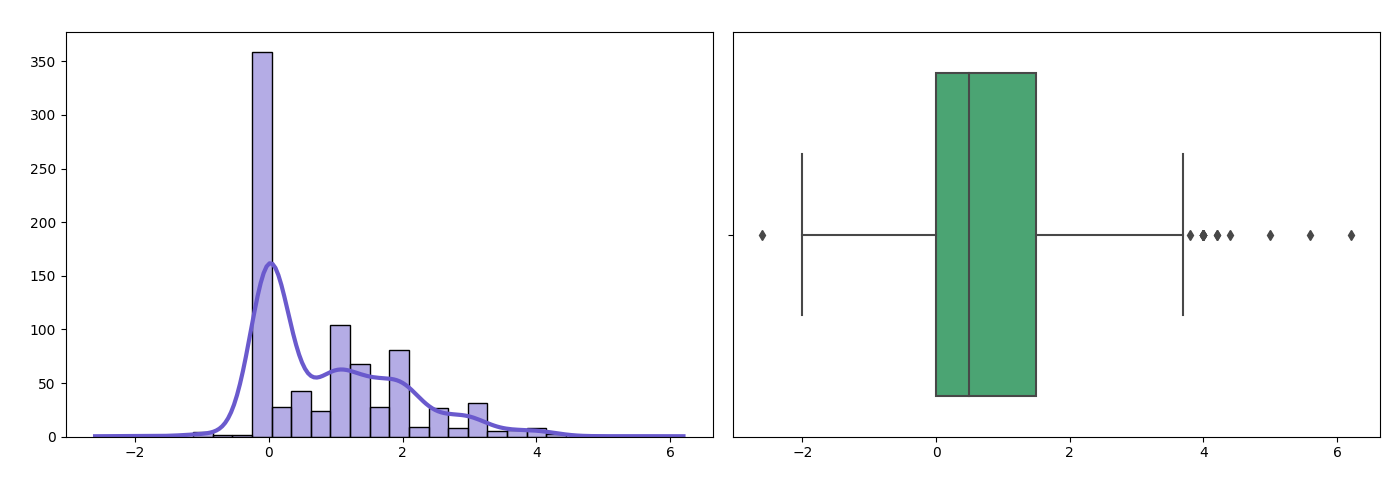

In [30]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    heart['oldpeak'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("ST depression", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=heart['oldpeak'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("ST depression", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


We see there are a lot of values around zero for oldpeak, this may be the people with no heart disease mostly.

In [31]:
heart[heart['oldpeak'].isna()]

,age,sex,cp,restbp,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
9,53,Male,non-anginal,155,175,True,st-t abnormality,160,False,NaN,upsloping,fixed defect,0
371,55,Male,atypical angina,110,214,True,st-t abnormality,180,False,NaN,flat,normal,0
380,69,Male,non-anginal,175,271,False,lv hypertrophy,82,False,NaN,upsloping,reversable defect,0
381,51,Male,asymptomatic,133,218,True,lv hypertrophy,156,True,NaN,upsloping,reversable defect,0
382,58,Male,asymptomatic,131,385,True,lv hypertrophy,126,True,NaN,flat,reversable defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,69,Male,asymptomatic,154,289,True,st-t abnormality,128,True,NaN,flat,fixed defect,3
878,64,Male,asymptomatic,134,306,True,st-t abnormality,73,True,NaN,upsloping,reversable defect,3
879,60,Male,non-anginal,186,316,True,st-t abnormality,70,True,NaN,flat,fixed defect,3
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,True,NaN,downsloping,fixed defect,4


In [32]:
heart['oldpeak'].describe()

count    846.000000
mean       0.891253
std        1.093875
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

In [33]:
heart['oldpeak'].mode()[0]

0.0

**We will replace the null values with the mode**

In [34]:
heart.loc[heart['oldpeak'].isna(),'oldpeak']=heart['oldpeak'].mode()[0]

**11. slope**

In [35]:
heart['slope'].unique()

array(['downsloping', 'flat', 'upsloping'], dtype=object)

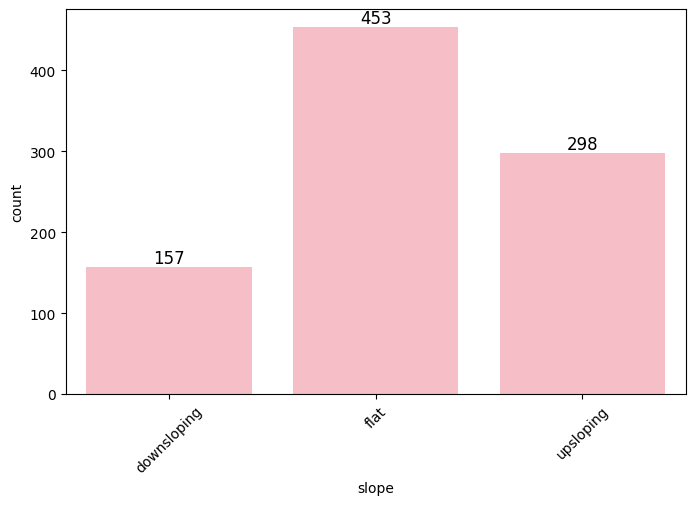

In [36]:
# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 5)) 
sns.countplot(x="slope", data=heart, color=count_color, ax=ax)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')
    
plt.xticks(rotation=45)
plt.show()

**12.thal**

In [37]:
heart['thal'].unique()

array(['fixed defect', 'normal', 'reversable defect'], dtype=object)

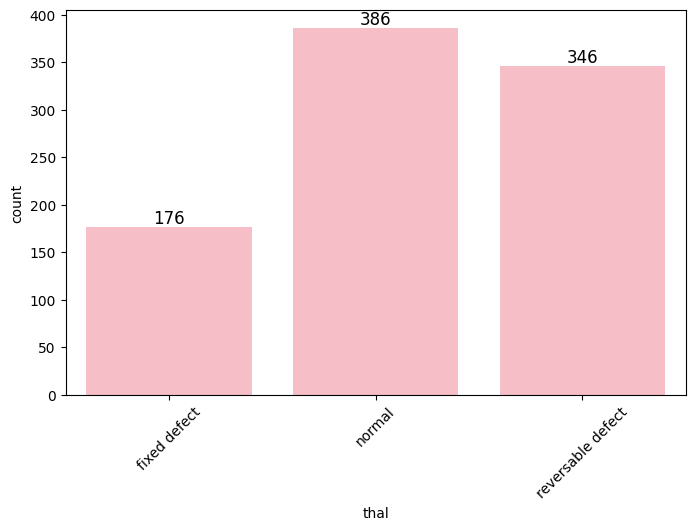

In [38]:
# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 5)) 
sns.countplot(x="thal", data=heart, color=count_color, ax=ax)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')
    
plt.xticks(rotation=45)
plt.show()

**13. num**

In [39]:
heart['num'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

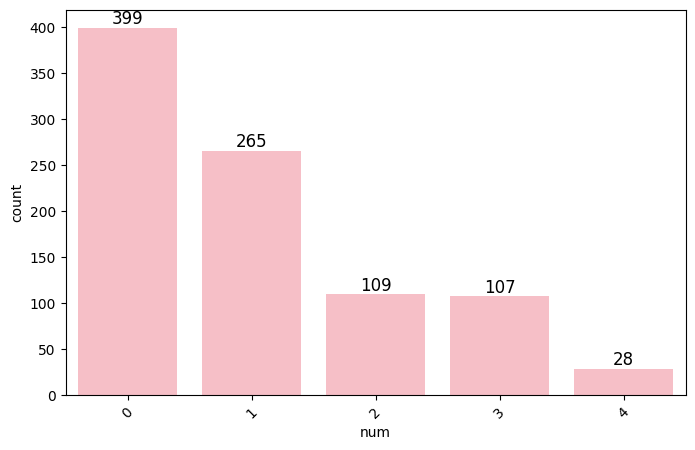

In [40]:
# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 5)) 
sns.countplot(x="num", data=heart, color=count_color, ax=ax)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')
    
plt.xticks(rotation=45)
plt.show()

## <h2 style="color:purple">3. Feature engineering</h2>

In [41]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      908 non-null    int64  
 1   sex      908 non-null    object 
 2   cp       908 non-null    object 
 3   restbp   908 non-null    int64  
 4   chol     908 non-null    int64  
 5   fbs      908 non-null    bool   
 6   restecg  908 non-null    object 
 7   thalch   908 non-null    int64  
 8   exang    908 non-null    object 
 9   oldpeak  908 non-null    float64
 10  slope    908 non-null    object 
 11  thal     908 non-null    object 
 12  num      908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [42]:
cat=['sex','cp','fbs','restecg','exang','slope','thal']
heart_processed = heart.copy()

As it is tree based algorithm we will do label encoding as it doesn't  struggle like other algorithms and it helps reduce dimensionality and  tree splitting.

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding
encoder = LabelEncoder()

# Apply Label Encoding to multiple columns
for col in cat:
    heart_processed[col] = encoder.fit_transform(heart[col])
heart_processed.head()


,age,sex,cp,restbp,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0


Because splitting based on feature threshold we don't require scaling for our numeric features and also generally not affected by outliers.

#### <h3 style="color:midnightblue">Visualize the cluster</h3>

In [45]:
from sklearn.manifold import TSNE

In [46]:
X = heart_processed.iloc[:,:12]


model = TSNE(n_components=2)
tdata = model.fit_transform(X)

In [47]:
tdf = pd.DataFrame(tdata, columns=['c1','c2'])
tdf.head()

,c1,c2
0,9.929594,0.305752
1,-3.067264,-1.395924
2,-8.735448,-5.842080
3,-10.628064,-16.318260
4,-9.708404,5.202872


In [48]:
tdf['class'] = heart_processed.iloc[:,12]

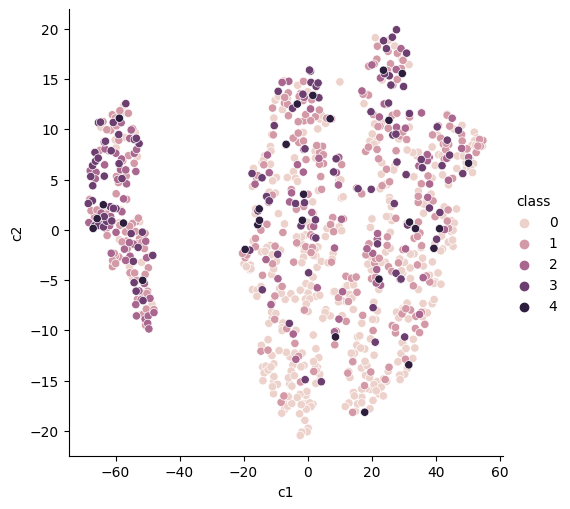

In [49]:
sns.relplot(data =tdf, x='c1',y='c2', kind='scatter' ,hue='class')
plt.show()

## <h2 style="color:purple">4. Decision tree classification</h2>

In [50]:
heart_processed.shape

(908, 13)

In [51]:
X = heart_processed.iloc[:,:12]
y = heart_processed.iloc[:,12]

In [52]:
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0


In [53]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: num, dtype: int64

In [54]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((726, 12), (182, 12), (726,), (182,))

#### <h3 style="color:midnightblue">Model building</h3>

In [55]:
clf = DecisionTreeClassifier(max_depth=5,criterion='entropy')
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [56]:
y_train_pred = clf.predict(X_train)

In [57]:
cm = confusion_matrix(y_train,y_train_pred)
cm

array([[272,  35,   1,   2,   0],
       [ 64, 141,   6,   5,   1],
       [ 15,  50,  10,   8,   4],
       [ 14,  39,   3,  30,   4],
       [  3,   8,   0,   0,  11]], dtype=int64)

In [58]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80       310
           1       0.52      0.65      0.58       217
           2       0.50      0.11      0.19        87
           3       0.67      0.33      0.44        90
           4       0.55      0.50      0.52        22

    accuracy                           0.64       726
   macro avg       0.59      0.50      0.51       726
weighted avg       0.63      0.64      0.61       726



In [59]:
y_test_pred = clf.predict(X_test)

In [60]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.85      0.78        89
           1       0.39      0.54      0.45        48
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         6

    accuracy                           0.56       182
   macro avg       0.22      0.28      0.25       182
weighted avg       0.45      0.56      0.50       182



## <h2 style="color:purple">5. Hyperparameter Tuning</h2>

We will check with hyperparamter tuning if the model performs well on testing data. As in the above case, we can see it performs  bad on higher classes which is important.

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
dt = DecisionTreeClassifier(random_state=42)

In [63]:
param_grid ={
    'max_depth': [3,5,10, None], #Control tree depth
    'min_samples_split':[2,5,10],  #minimum samples needed to split a node
    'min_samples_leaf':[3,4,5,6], #minimum samples per leaf node
    'criterion': ['gini','entropy'] #splitting criteria
}

In [64]:
grid_search  = GridSearchCV(dt,param_grid,cv=5, scoring='accuracy', n_jobs=-1,verbose=1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [65]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [66]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

In [67]:
grid_search.best_score_

0.5427491733585262

We will use class weight feature so that decision tree internally deals with imbalance classes

In [68]:
best_dt = DecisionTreeClassifier(class_weight="balanced", max_depth=5, min_samples_leaf=4, random_state=42)
best_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=4,
                       random_state=42)

In [69]:
y_train_pred = best_dt.predict(X_train)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73       310
           1       0.51      0.42      0.46       217
           2       0.33      0.60      0.43        87
           3       0.50      0.46      0.48        90
           4       0.36      0.86      0.51        22

    accuracy                           0.57       726
   macro avg       0.50      0.60      0.52       726
weighted avg       0.61      0.57      0.58       726



In [70]:
y_test_pred = best_dt.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.5054945054945055

In [71]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75        89
           1       0.44      0.44      0.44        48
           2       0.19      0.32      0.24        22
           3       0.20      0.12      0.15        17
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.33      0.31      0.31       182
weighted avg       0.55      0.51      0.52       182



#### <h3 style="color:midnightblue">Use SMOTE for Oversampling (Boost Rare Cases)</h3>

In [72]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [73]:
best_dt = DecisionTreeClassifier(class_weight="balanced", max_depth=5, min_samples_leaf=4, random_state=42)
best_dt.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=4,
                       random_state=42)

In [74]:
y_train_pred = best_dt.predict(X_train)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       310
           1       0.58      0.37      0.45       217
           2       0.36      0.55      0.44        87
           3       0.51      0.39      0.44        90
           4       0.32      0.64      0.42        22

    accuracy                           0.59       726
   macro avg       0.50      0.55      0.51       726
weighted avg       0.61      0.59      0.59       726



In [75]:
y_test_pred = best_dt.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.5274725274725275

In [76]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        89
           1       0.39      0.31      0.35        48
           2       0.20      0.23      0.21        22
           3       0.17      0.12      0.14        17
           4       0.10      0.17      0.12         6

    accuracy                           0.53       182
   macro avg       0.32      0.33      0.32       182
weighted avg       0.52      0.53      0.52       182



#### <h3 style="color:midnightblue">Check for threshold tuning</h3>

In [77]:
y_probs = best_dt.predict_proba(X_test)[:, 1]  # Probabilities for class 1


In [78]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
import numpy as np

# Convert y_test to a binary matrix for each class
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
y_probs = best_dt.predict_proba(X_test)  # Get probability estimates from the model

best_thresholds = {}

# Compute precision-recall curve for each class
for i in range(y_test_bin.shape[1]):  # Loop through classes (0-4)
    precisions, recalls, thresholds = precision_recall_curve(y_test_bin[:, i], y_probs[:, i])

    # Get threshold that maximizes recall
    best_threshold = thresholds[np.argmax(recalls)]
    best_thresholds[i] = best_threshold

print("Best thresholds per class:", best_thresholds)



Best thresholds per class: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0}


The best threshold here is giving zeros because:
- Model isn't confident about predicting minority classes
- precision_recall_curve is unreliable for extremely imbalanced multiclass problems

#### <h3 style="color:midnightblue">Visualize the tree</h3>

In [81]:
from sklearn.tree import plot_tree

In [82]:
fnames = X.head().columns
fnames

Index(['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal'],
      dtype='object')

In [83]:
cnames = y.unique()
cnames = [str(c) for c in cnames] 
cnames

['0', '1', '2', '3', '4']

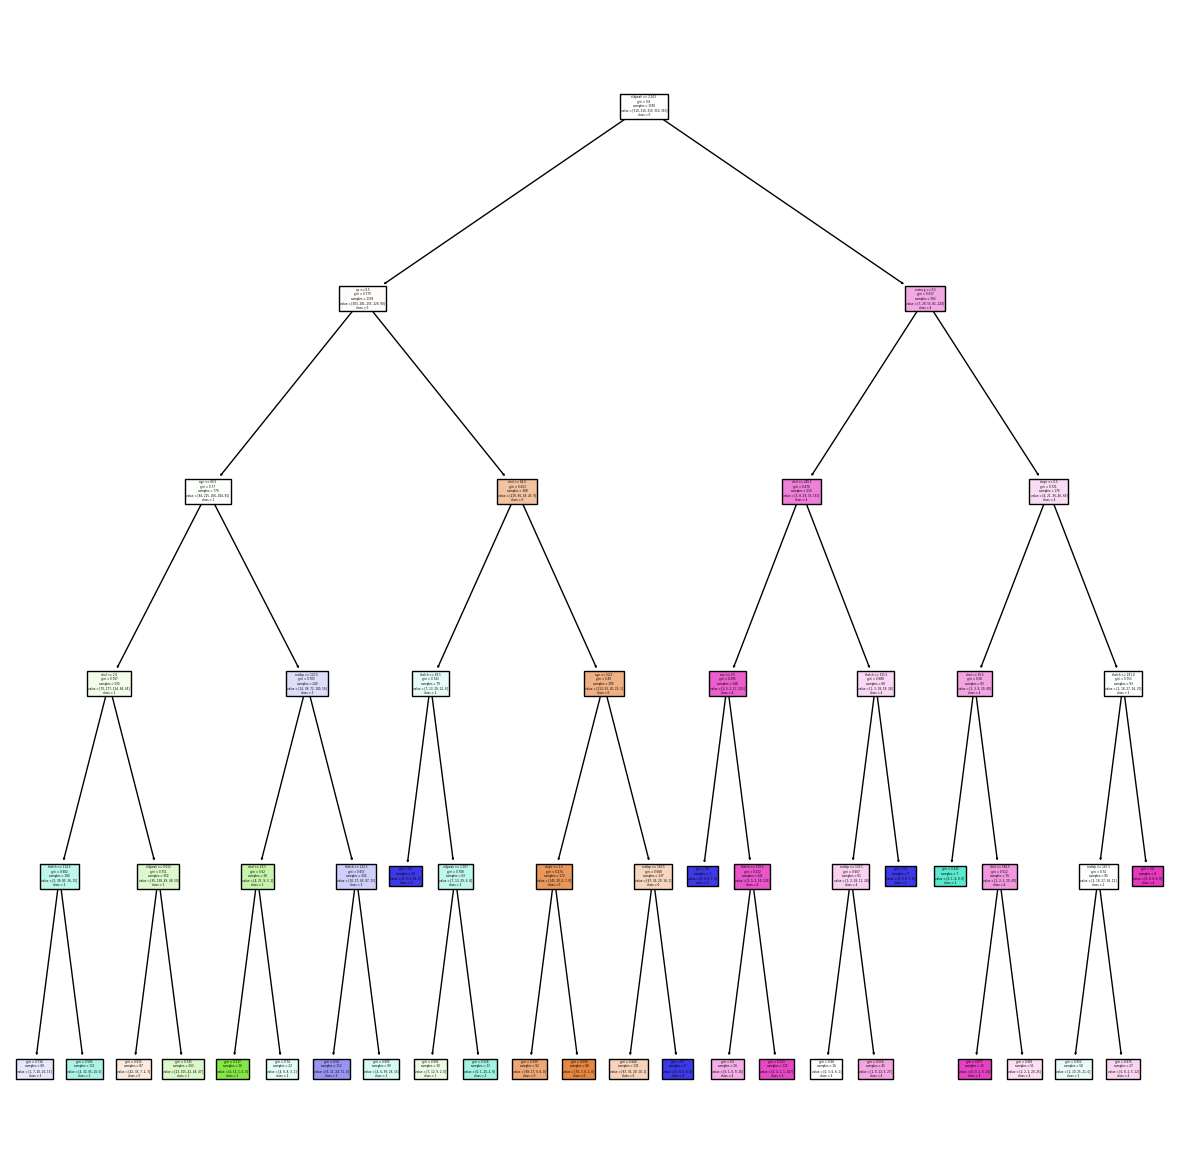

In [84]:
plt.figure(figsize=(15,15))
plot_tree(best_dt, feature_names=fnames, class_names=cnames, filled=True )
plt.show()

We will save this image into pdf so it is zoomable and we can see the criteria for splitting clearly.

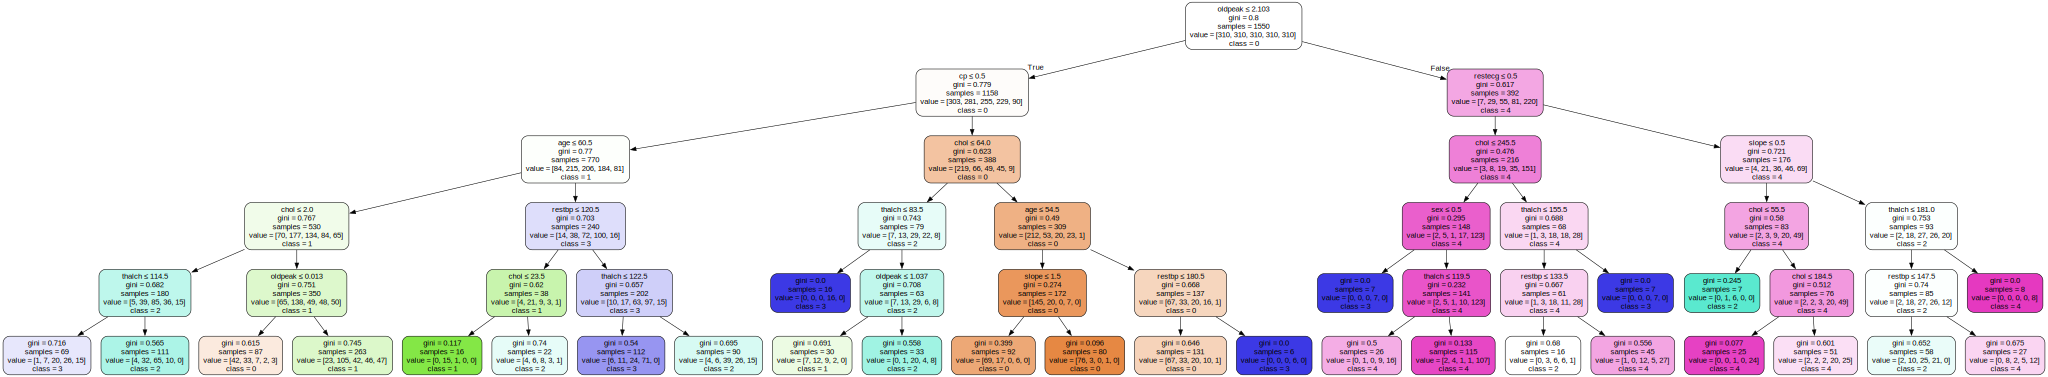

In [86]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(best_dt, out_file=None, 
                           feature_names=fnames, 
                           class_names=cnames, 
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
#graph.render("decision_tree")  # Saves as 'decision_tree.pdf'
graph

#### <h3 style="color:midnightblue">Feature importance</h3>

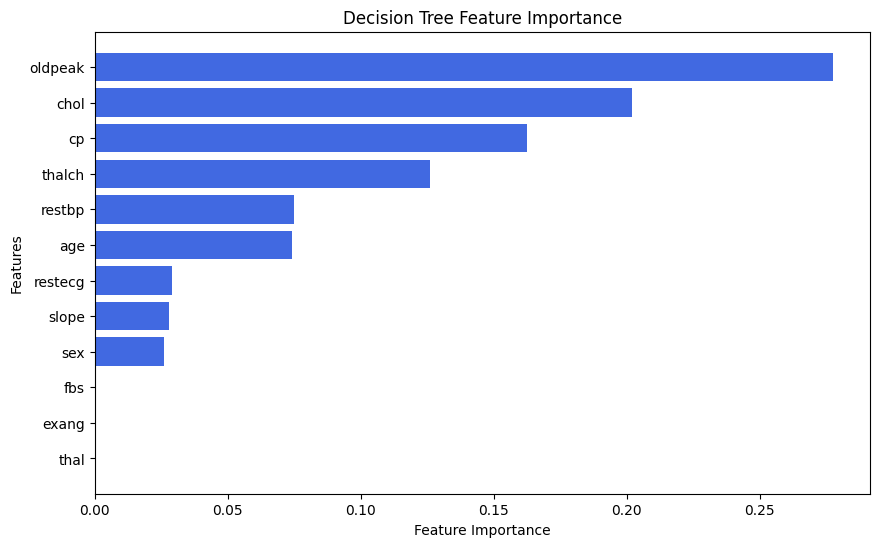

In [87]:
# Assuming best_dt is your trained DecisionTreeClassifier
feature_importance = best_dt.feature_importances_

# Assuming fnames contains feature names
feature_importance_df = pd.DataFrame({"Feature": fnames, "Importance": feature_importance})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color="royalblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Decision Tree Feature Importance")
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.show()

#### <h3 style="color:midnightblue">Analysis</h3>

- The first split happens on oldpeak ≤ 2.103, which suggests that exercise-induced ST depression (oldpeak) is the most important factor in determining heart disease stage.
- Chest pain (cp) and ECG results (restecg) are major determinants for classification.
- Older individuals (age > 60.5) tend to be classified into different disease stages.
- People with higher cholesterol and lower maximum heart rate (thalch) tend to be classified into more severe stages of heart disease.
- restbp (resting blood pressure) contributes to further splitting, especially in distinguishing class 2 vs. class 3.

#### <h3 style="color:midnightblue">Questions</h3>

#### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

#### Common Hyperparameters of Decision Tree Models & Their Effects

| **Hyperparameter**  | **Description** | **Effect on Model** |
|--------------------|---------------|------------------|
| `criterion` (`gini` or `entropy`) | Splitting strategy: **Gini impurity** (default) vs. **Entropy (Information Gain)** | `entropy` can be slower but sometimes leads to better splits. |
| `max_depth` | Maximum depth of the tree. | Prevents overfitting if set too low; prevents underfitting if set too high. |
| `min_samples_split` | Minimum samples needed to split a node. | Higher values make trees more **generalized** (less overfitting). |
| `min_samples_leaf` | Minimum samples in a leaf node. | Prevents too-small leaf nodes (helps with stability). |
| `max_leaf_nodes` | Limits the number of leaf nodes. | Reduces complexity and overfitting. |
| `ccp_alpha` | Pruning parameter (Cost Complexity Pruning). | Higher values **prune more**, making the tree **simpler** and more generalizable. |

---

#### 2. What is the difference between the Label encoding and One-hot encoding?

#### Difference Between Label Encoding & One-Hot Encoding

| **Encoding Type**  | **How It Works** | **When to Use?** | **Example** |
|--------------------|----------------|----------------|-------------|
| **Label Encoding** | Converts categories into **numerical values** (0, 1, 2, …). | Works best with **ordinal data** (ordered categories). | `["Low", "Medium", "High"]` → `[0, 1, 2]` |
| **One-Hot Encoding** | Creates **binary columns** for each category. | Best for **nominal data** (no inherent order). | `["Red", "Blue", "Green"]` → `[[1,0,0], [0,1,0], [0,0,1]]` |

- **Label Encoding is preferred** because Decision Trees handle categorical data well.  
- **One-Hot Encoding increases dimensionality**, making trees more complex.  


# <center><h2 style = "color:navy;">End of file</h2></center>